# Paper figures that don't include spatial data

Except of the metric tables, they are located in `05b_sc_figures_metric_tables.ipynb`

## Paths and imports

In [1]:
DATA_DIR = "/storage/groups/ml01/workspace/louis.kuemmerle/projects/G1/data/"
RESULTS_DIR = "/storage/groups/ml01/workspace/louis.kuemmerle/projects/G1/experiments/results/"

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
from matplotlib import colors
from matplotlib import patches

plt.rcParams['figure.dpi'] = 150
SMALL_SIZE =   9  #17
MEDIUM_SIZE = 11  #19
BIGGER_SIZE = 13  #21
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Figure 1
- a,b,c only schematics
- d captured in `05b_sc_figures_metric_tables.ipynb`

## Figure 2
- a,b schematics

### Fig 2c

In [32]:
from spapros.util.util import preprocess_adata
adata = sc.read(DATA_DIR+'processed/Madissoon2019.h5ad')
preprocess_adata(adata,options=["norm", "log1p"])

8000 HVG Reference

In [56]:
a = adata[:,adata.var["highly_variable"]].copy()
del a.obsm["X_umap"]

sc.tl.pca(a)
sc.pp.neighbors(a)
sc.tl.umap(a)

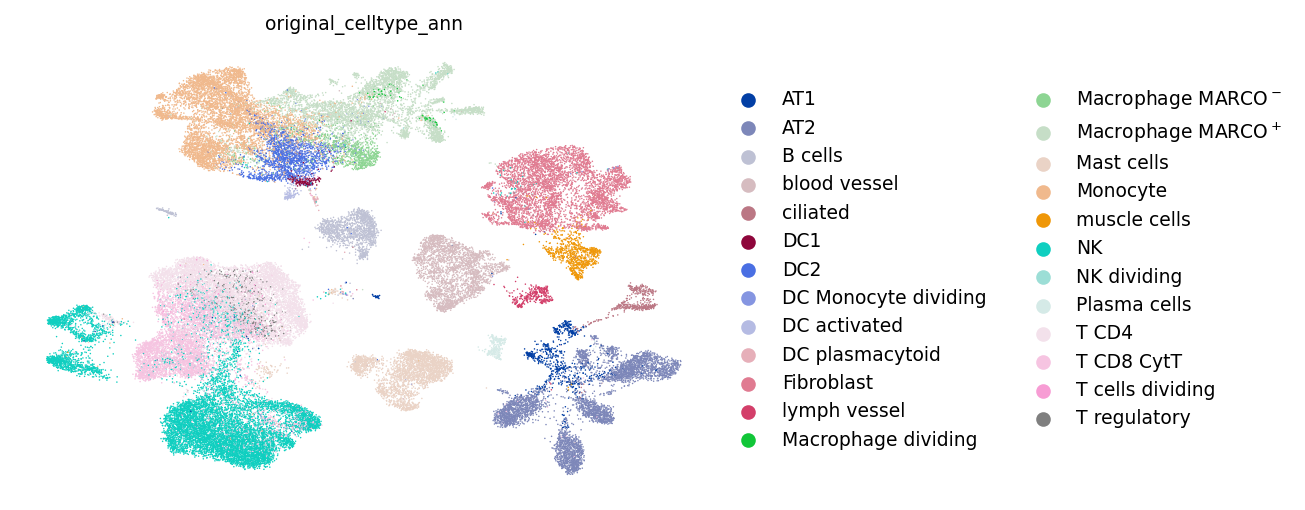

In [38]:
a_tmp = adata.copy()
#a_tmp.obs["original_celltype_ann"].cat.categories.tolist()

rename = {
    'Alveolar_Type1'       : 'AT1',
    'Alveolar_Type2'       : 'AT2',
    'B_cells'              : 'B cells',
    'Blood_vessel'         : 'blood vessel',
    'Ciliated'             : 'ciliated',
    'DC_1'                 : 'DC1',
    'DC_2'                 : 'DC2',
    'DC_Monocyte_Dividing' : 'DC Monocyte dividing',
    'DC_activated'         : 'DC activated',
    'DC_plasmacytoid'      : 'DC plasmacytoid',
    'Fibroblast'           : 'Fibroblast',
    'Lymph_vessel'         : 'lymph vessel',
    'Macrophage_Dividing'  : 'Macrophage dividing',
    'Macrophage_MARCOneg'  : 'Macrophage MARCO$^-$',
    'Macrophage_MARCOpos'  : 'Macrophage MARCO$^+$',
    'Mast_cells'           : 'Mast cells',
    'Monocyte'             : 'Monocyte',
    'Muscle_cells'         : 'muscle cells',
    'NK'                   : 'NK',
    'NK_Dividing'          : 'NK dividing',
    'Plasma_cells'         : 'Plasma cells',
    'T_CD4'                : 'T CD4',
    'T_CD8_CytT'           : 'T CD8 CytT',
    'T_cells_Dividing'     : 'T cells dividing',
    'T_regulatory'         : 'T regulatory',
}

a_tmp.obs["original_celltype_ann"] = a_tmp.obs["original_celltype_ann"].cat.rename_categories(rename)

ax = plt.gca()
sc.pl.umap(a_tmp,color="original_celltype_ann",frameon=False,ax=ax,show=False)
plt.gcf().savefig("./figures/Fig1c_8000hvg_legend.png",transparent=True,bbox_inches = "tight")
plt.show()
plt.close()

del a_tmp

Selections PCA, DE, HVG, random

In [66]:
selections = pd.read_csv("./scripts/results/FSmethods_selection/selections.csv",index_col=0)
selection_info = pd.read_csv("./scripts/results/FSmethods_selection/selections_info.csv",index_col=0)

names_based_on_options = {
    "pca (unscaled)" : {"method":"pca", "scaled":False},
    "diff. expr." : {"method":"DE"},
    "hvg" : {"method":"hvg"},
    "random" : {"method":"random"},
}

# Get set_ids for each method name/configuration
name_to_selections = {}
for name, options in names_based_on_options.items():
    filt = True
    for o, val in options.items():
        filt = filt & (selection_info[o] == val)
    name_to_selections[name] = selection_info.loc[filt].index.tolist()[0]
    
for name, s in name_to_selections.items():
    name_to_selections[name] = selections.loc[selections[s],s].index.tolist()

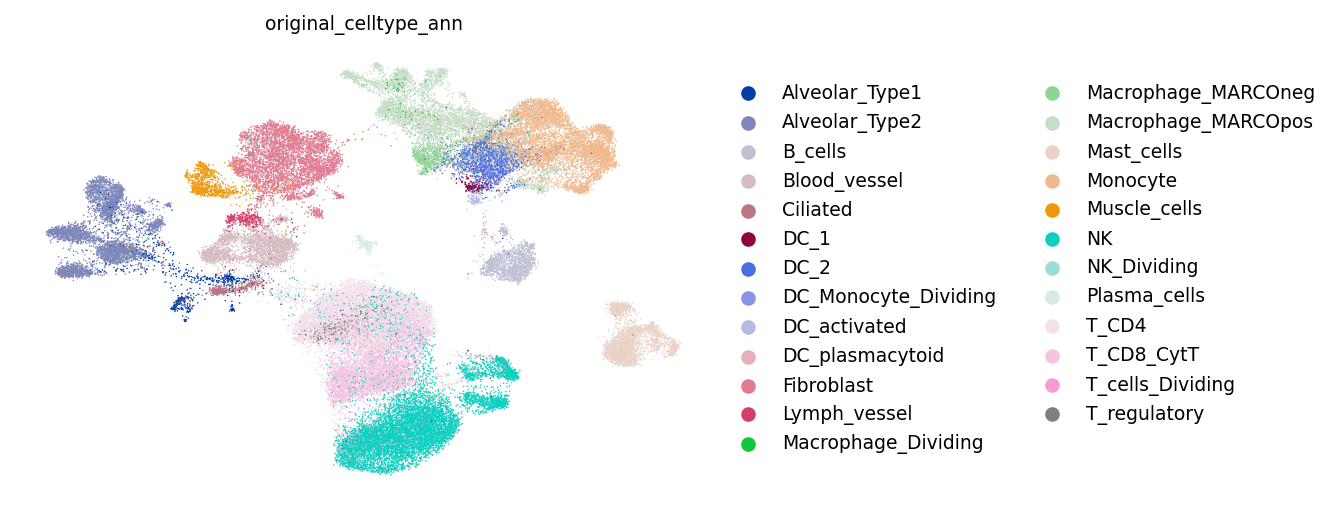

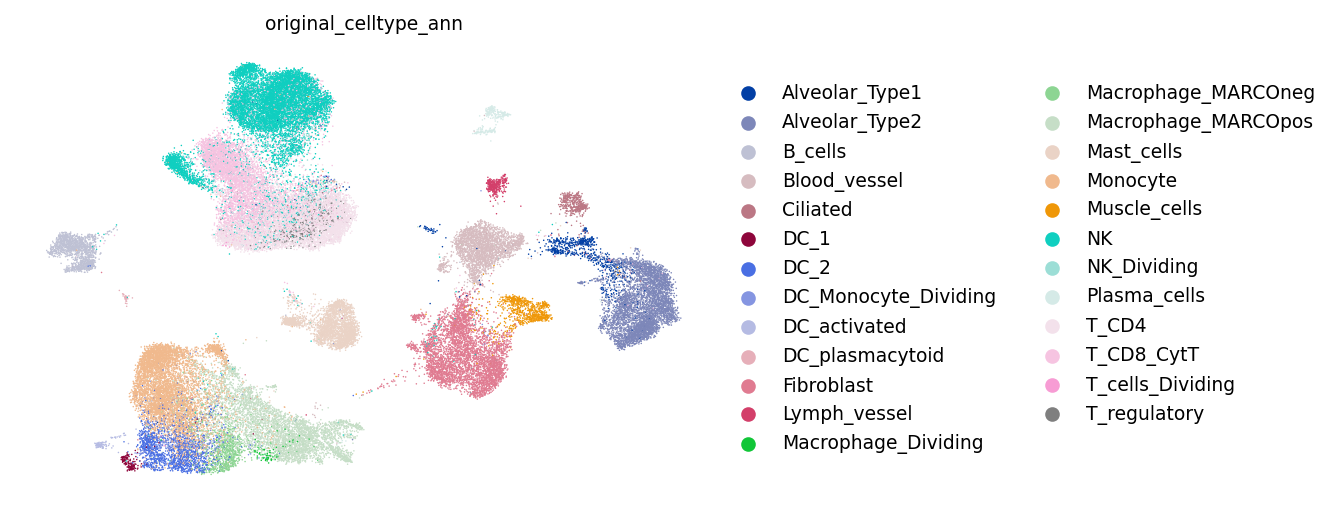

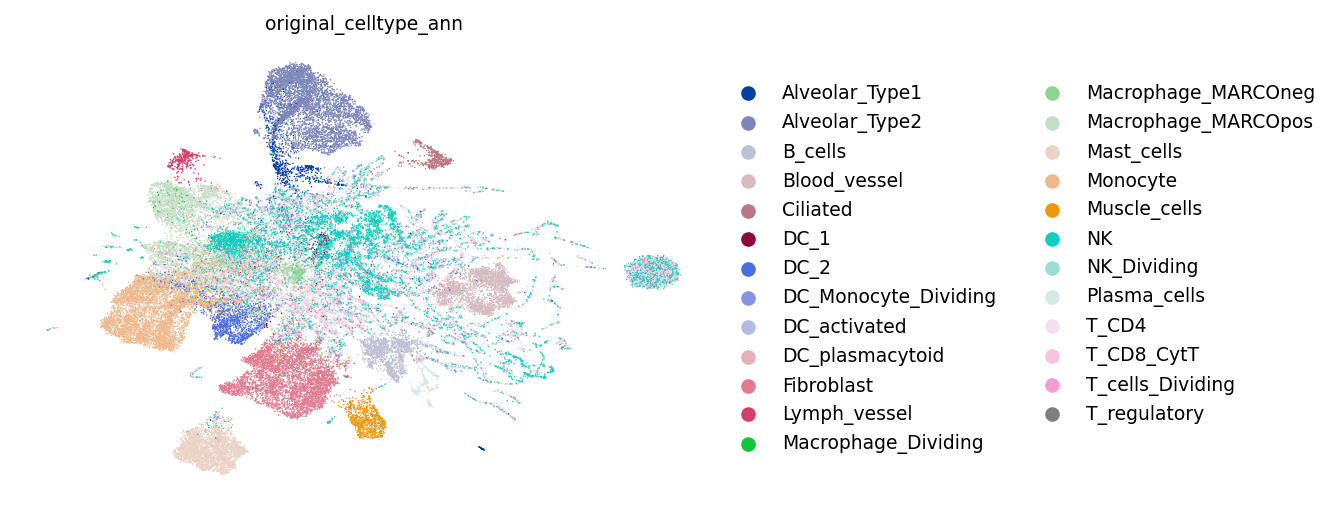

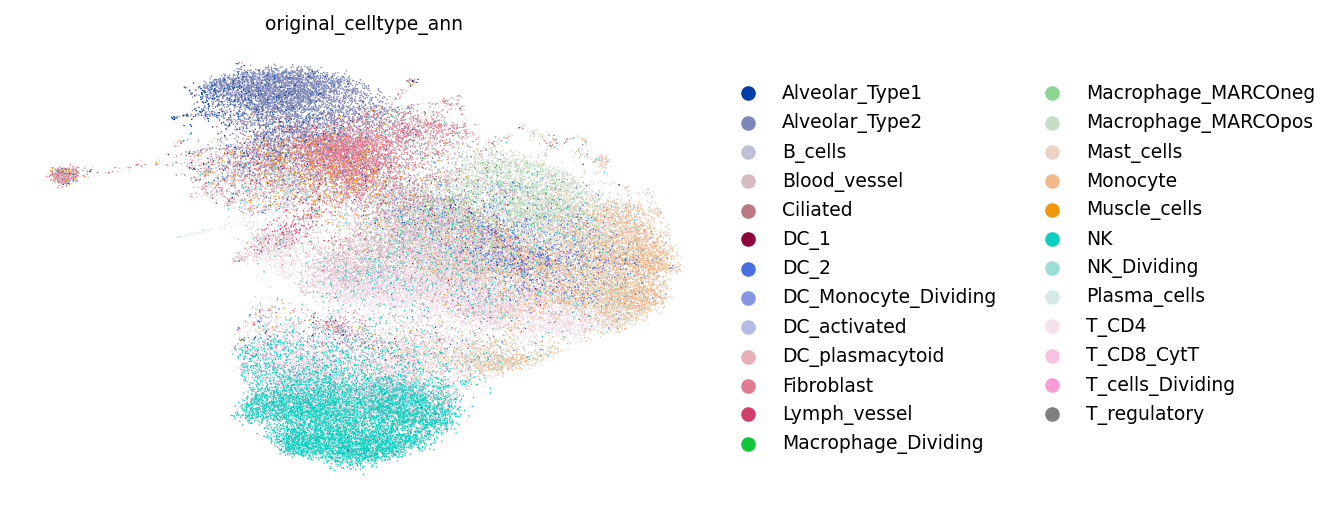

In [69]:
for name, genes in name_to_selections.items():
    a = adata[:,genes].copy()
    del a.obsm["X_umap"]

    sc.tl.pca(a)
    sc.pp.neighbors(a)
    sc.tl.umap(a)
    
    ax = plt.gca()
    sc.pl.umap(a,color="original_celltype_ann",frameon=False,ax=ax,show=False)
    plt.gcf().savefig(f"./figures/Fig1c_{name}.png",transparent=True,bbox_inches = "tight")
    plt.show()
    plt.close()

In [4]:
from spapros.util.util import preprocess_adata
adata = sc.read(DATA_DIR+'processed/Madissoon2019.h5ad')
preprocess_adata(adata,options=["norm", "log1p"])

a = adata[:,adata.var["highly_variable"]].copy()
del a.obsm["X_umap"]

In [4]:
selections = pd.read_csv("./scripts/results/Fig2b_selection/selections.csv",index_col=0)
selection_info = pd.read_csv("./scripts/results/Fig2b_selection/selections_info.csv",index_col=0)

names_based_on_options = {
    "spapros" : {"method":"spapros"},
#    "diff. expr." : {"method":"DE"},
#    "hvg" : {"method":"hvg"},
#    "random" : {"method":"random"},
}

# Get set_ids for each method name/configuration
name_to_selections = {}
for name, options in names_based_on_options.items():
    filt = True
    for o, val in options.items():
        filt = filt & (selection_info[o] == val)
    name_to_selections[name] = selection_info.loc[filt].index.tolist()[0]
    
for name, s in name_to_selections.items():
    name_to_selections[name] = selections.loc[selections[s],s].index.tolist()

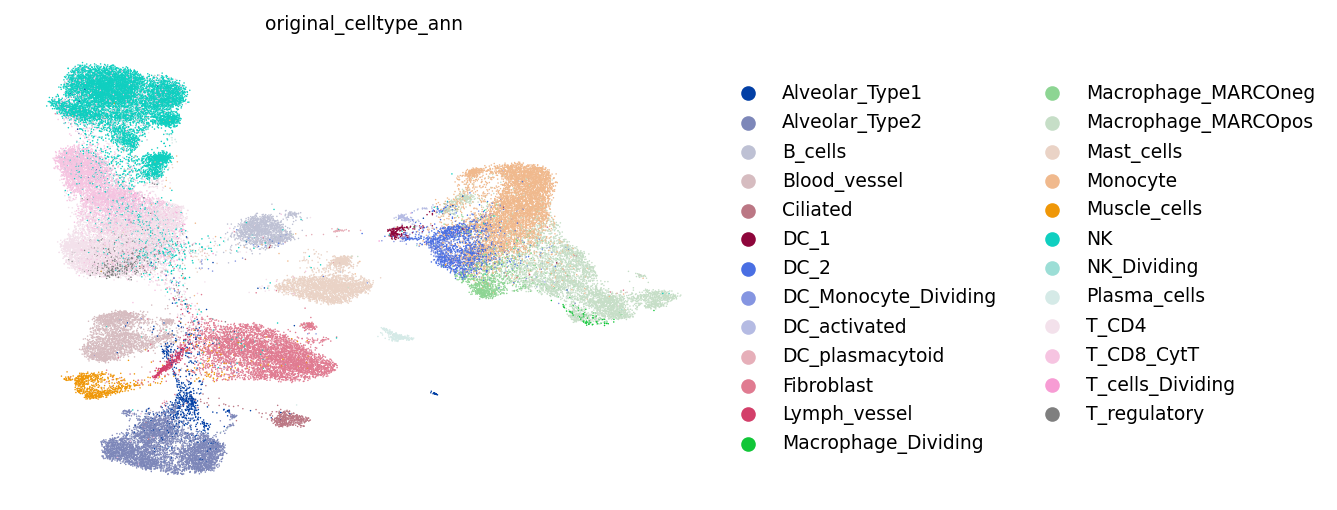

In [8]:
for name, genes in name_to_selections.items():
    a = adata[:,genes].copy()
    del a.obsm["X_umap"]

    sc.tl.pca(a)
    sc.pp.neighbors(a)
    sc.tl.umap(a)
    
    ax = plt.gca()
    sc.pl.umap(a,color="original_celltype_ann",frameon=False,ax=ax,show=False)
    plt.gcf().savefig(f"./figures/Fig2b_{name}.png",transparent=True,bbox_inches = "tight")
    plt.show()
    plt.close()

In [10]:
selections = pd.read_csv("./scripts/results/Fig4_selection_spapros/selections.csv",index_col=0)
selection_info = pd.read_csv("./scripts/results/Fig4_selection_spapros/selections_info.csv",index_col=0)

names_based_on_options = {
    "spapros" : {"method":"spapros","n":150},
#    "diff. expr." : {"method":"DE"},
#    "hvg" : {"method":"hvg"},
#    "random" : {"method":"random"},
}

# Get set_ids for each method name/configuration
name_to_selections = {}
for name, options in names_based_on_options.items():
    filt = True
    for o, val in options.items():
        filt = filt & (selection_info[o] == val)
    name_to_selections[name] = selection_info.loc[filt].index.tolist()[0]
    
for name, s in name_to_selections.items():
    name_to_selections[name] = selections.loc[selections[s],s].index.tolist()

In [11]:
len(name_to_selections["spapros"])

150

In [ ]:
for name, genes in name_to_selections.items():
    a = adata[:,genes].copy()
    del a.obsm["X_umap"]

    sc.tl.pca(a)
    sc.pp.neighbors(a)
    sc.tl.umap(a)
    
    ax = plt.gca()
    sc.pl.umap(a,color="original_celltype_ann",frameon=False,ax=ax,show=False)
    plt.gcf().savefig(f"./figures/Fig2b_{name}_n{len(name_to_selections[name])}.png",transparent=True,bbox_inches = "tight")
    plt.show()
    plt.close()

### Fig 2d

In [2]:
import scanpy as sc
import spapros.selection as select
#from spapros.selection import ProbesetSelector
from importlib import reload
from spapros.util.util import preprocess_adata
import matplotlib.pyplot as plt

/mnt/home/icb/louis.kuemmerle/projects/st_probesets/spapros/spapros/selection/selection_procedure.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
adata = sc.read("/storage/groups/ml01/workspace/louis.kuemmerle/projects/G1/data/processed/Madissoon2019.h5ad")
preprocess_adata(adata, options=["norm", "log1p"], inplace=True)
# This was active for the selection, but not for plotting
#adata = adata[:,adata.var["highly_variable"]]  

In [4]:
selector = select.ProbesetSelector(
    adata,
    'original_celltype_ann',
    genes_key = 'highly_variable',
    n = 50,
    preselected_genes = [],
    prior_genes = [],
    n_pca_genes = 100,
    min_mean_difference = None,
    n_min_markers = 1,
    celltypes = 'all',
    marker_list = "/storage/groups/ml01/workspace/louis.kuemmerle/projects/G1/data/marker_list/reduced_lung_marker_list.csv",
    n_list_markers = 2,
    marker_corr_th = 0.5,
    pca_penalties = ["expression_penalty_lower","expression_penalty_upper"],
    DE_penalties = ["expression_penalty_lower","expression_penalty_upper"],
    m_penalties_adata_celltypes = ["expression_penalty_lower","expression_penalty_upper"],
    m_penalties_list_celltypes = ["expression_penalty_upper"],
    pca_selection_hparams = {},
    verbosity = 2,
    seed = 0,
    #save_dir = "./results/Fig2d_selection/full_selection/",
    save_dir = "/storage/groups/ml01/workspace/louis.kuemmerle/projects/G1/experiments/results/Fig2d_selection/full_selection/"
)

The following celltypes' test set sizes for forest training are below min_test_n (=20):
	 DC_plasmacytoid : 10
Searching for previous results in ./results/Fig2d_selection/full_selection/
	 Found and load marker_list.txt (filtered marker list).
	 Found and load pca_selected.csv (selection results).
	 Found and load DE_selected.csv (selection results).
	 Found and load forest_DEs_selected.csv (selection results).
	 Found and load DE_baseline_forest_selected.csv (selection results).
	 Found and load forest_selected.csv (selection results).
	 Found and load probeset.csv (selection results).
	 Found and load DE_prior_forest_results.pkl (forest training results).
	 Found and load DE_baseline_forest_results.pkl (forest training results).
	 Found and load pca_prior_forest_results.pkl (forest training results).
	 Found and load forest_results.pkl (forest training results).
	 Found and load DE_baseline_forest_clfs.pkl (forest classifier objects).
	 Found and load forest_clfs.pkl (forest classifi

In [5]:
selector.select_probeset()

PCA genes already selected...
Select genes based on differential expression and forests as baseline for the final forests...
	 Differentially expressed genes already selected...
Train final forests by adding genes from the DE_baseline forest for celltypes with low performance...
	 Train forest on pre/prior/pca selected genes...
	 Iteratively add genes from DE_baseline_forest...


In [7]:
from spapros.plotting import masked_dotplot

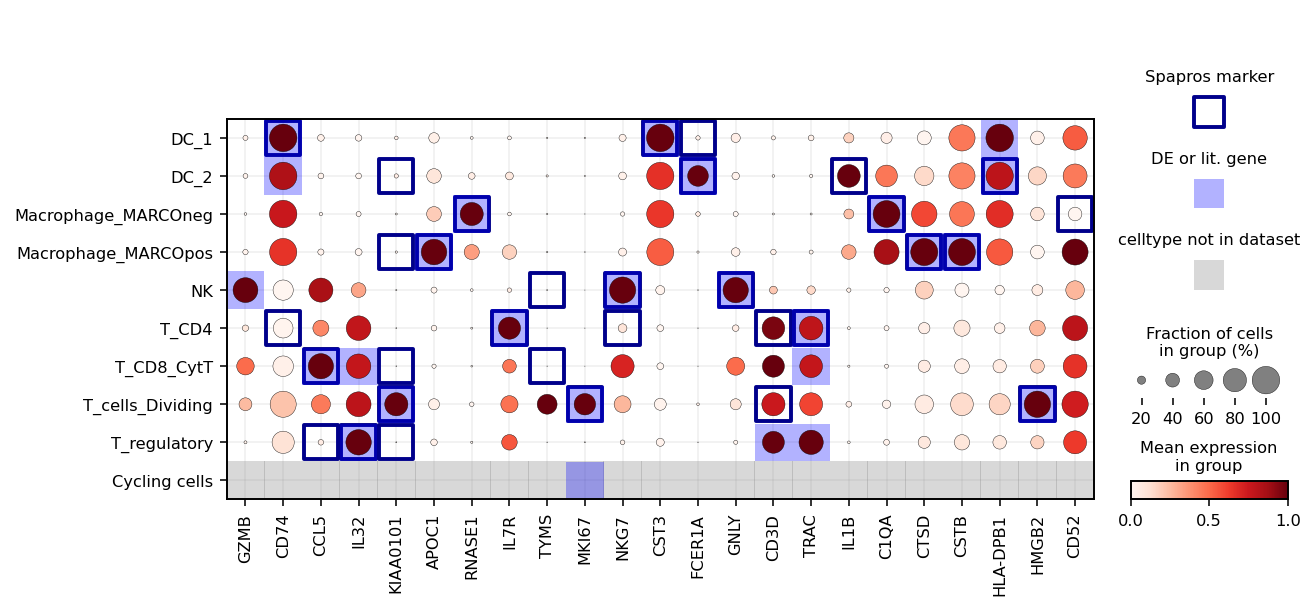

In [14]:
plt.rcParams['figure.dpi'] = 140
plt.rcParams['axes.linewidth'] = 1
plt.rcParams.update({"axes.grid" : True, "grid.linewidth": 20})

masked_dotplot(
    adata, 
    selector, 
    ct_key="original_celltype_ann", 
    imp_threshold = 0.05,
    celltypes=["NK","T_CD8_CytT","T_CD4","T_regulatory","T_cells_Dividing",
               "Macrophage_MARCOneg","Macrophage_MARCOpos","DC_2","DC_1","Cycling cells"],
    n_genes=23,
    comb_markers_only=True,
    markers_only=True,
    cmap="Reds",
    comb_marker_color="darkblue",
    marker_color="blue",
    save="../figures/masked_dotplot.png"
)

### Fig 2e - cell type classification accuracy

In [6]:
set_info = pd.read_csv(
    #"/home/icb/louis.kuemmerle/projects/st_probesets/experiments/scripts/results/Fig2b_selection/selections_info.csv",
    "/storage/groups/ml01/workspace/louis.kuemmerle/projects/G1/experiments/results/Fig2b_selection/selections_info.csv",
    index_col=0
)

In [7]:
conf_mats = {}
for set_id, method in set_info["method"].items():
    conf_mats[method] = pd.read_csv(
        #f"/home/icb/louis.kuemmerle/projects/st_probesets/experiments/scripts/results/Fig2be_evaluation/forest_clfs/forest_clfs_Madissoon_{set_id}.csv",
        f"/storage/groups/ml01/workspace/louis.kuemmerle/projects/G1/experiments/results/Fig2be_evaluation/forest_clfs/forest_clfs_Madissoon_{set_id}.csv",
        index_col=0
    )

Subset to region with higher difference

In [36]:
subset = ["Macrophage_MARCOneg","DC_2","Macrophage_MARCOpos","NK","T_CD8_CytT","T_CD4","T_regulatory","T_cells_Dividing","DC_1"]
conf_mats_subsets = {key:mat.loc[subset,subset] for key,mat in conf_mats.items()}
#["Monocyte"]

In [37]:
subset_ordered = ["NK","T_CD8_CytT","T_CD4","T_regulatory","T_cells_Dividing",
                  "Macrophage_MARCOneg","Macrophage_MARCOpos","DC_2","DC_1"]
diff_mat = conf_mats_subsets["spapros"] - conf_mats_subsets["DE"]
diff_mat = diff_mat.loc[subset_ordered,subset_ordered]

In [38]:
rename = {
    "Macrophage_MARCOneg":"Macrophage\nMARCOneg",
    "Macrophage_MARCOpos":"Macrophage\nMARCOpos",
    "T_cells_Dividing":"T_cells\nDividing",
}

diff_mat = diff_mat.rename(rename,axis=0)
diff_mat = diff_mat.rename(rename,axis=1)

rename2 = {
    'T_CD8_CytT'           : 'T CD8 CytT', 
    'T_CD4'                : 'T CD4', 
    'T_regulatory'         : 'T regulatory', 
    'T_cells\nDividing'    : 'T cells\ndividing',
    'Macrophage\nMARCOneg' : 'Macrophage\nMARCO$^-$', 
    'Macrophage\nMARCOpos' : 'Macrophage\nMARCO$^+$', 
    'DC_2'                 : 'DC2', 
    'DC_1'                 : 'DC1'
}

diff_mat = diff_mat.rename(rename2,axis=0)
diff_mat = diff_mat.rename(rename2,axis=1)

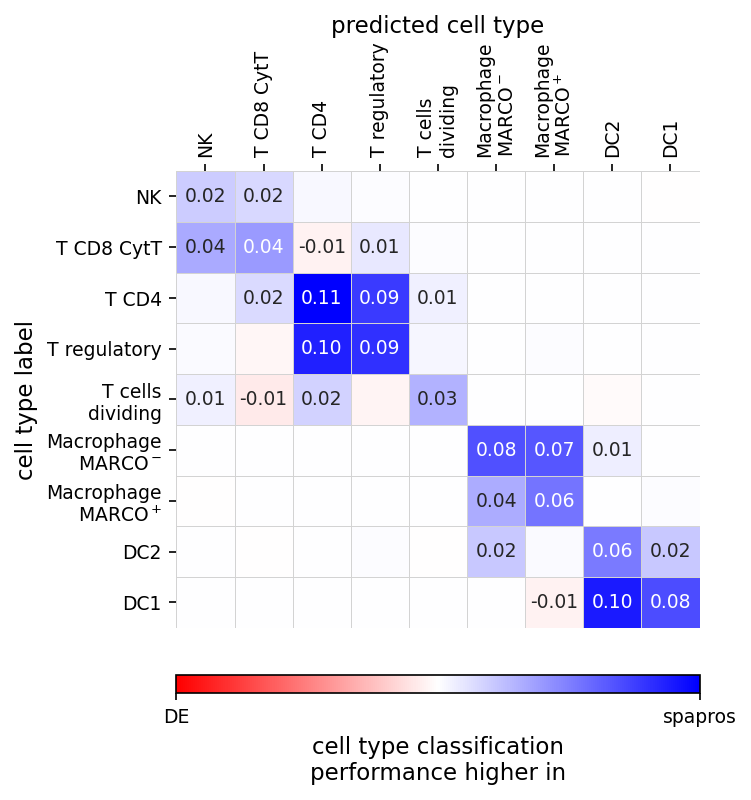

In [41]:
fig, (ax,cax) = plt.subplots(nrows=2, figsize=(6 * 0.75, 0.75 * 6 * 1.025),  gridspec_kw={"height_ratios":[1,0.04]})

max_val = diff_mat.abs().max().max()

diff_mat_off_diag_inverted = diff_mat.copy()
off_diag_mask = ~np.eye(*diff_mat.shape, dtype=bool)
diff_mat_off_diag_inverted.values[off_diag_mask] = -diff_mat_off_diag_inverted.values[off_diag_mask]
formatter = lambda s: f"{s:.2f}" if (abs(s) > 0.005) else ""
annot = diff_mat_off_diag_inverted.applymap(formatter).values#[:, np.newaxis] if isinstance(annot,bool) else annot

# Invert colors of non diagonal values 
tmp = diff_mat.values.copy()
mask = np.ones(tmp.shape, dtype=bool)
np.fill_diagonal(mask, 0)
diff_mat_colors = diff_mat.copy()
diff_mat_colors.values[mask] = -diff_mat_colors.values[mask]

sns.heatmap(diff_mat_colors, cmap="bwr_r", cbar=False, ax=ax, vmin=-max_val, vmax=max_val, square=False, annot=annot, fmt="", 
            
            linewidths=0.45, linecolor="lightgrey",cbar_ax=None)#,
            #cbar_kws = dict(use_gridspec=False,location="bottom",orientation="horizontal"))#, annot=True, fmt=".2f")
    
cbar = fig.colorbar(ax.get_children()[0], cax=cax, orientation="horizontal")#,shrink=0.7, aspect=20*0.7,fraction=0.46, pad=0.4)
cbar.set_ticks([-max_val,max_val])
cbar.set_ticklabels(["DE","spapros"])
cbar.set_label('cell type classification\nperformance higher in')#('performance higher in')#, rotation=0)

plt.sca(ax)
plt.tick_params(axis="both", which="major", bottom=False, labelbottom=False, top=True, labeltop=True)
#ax.set_xticklabels(plt.gca().get_xticklabels(),ha="left")
plt.setp(plt.gca().get_xticklabels(), ha="center", ma="left", rotation=90)# ha="left", rotation=45)
#plt.title("cell type classif. spapros vs DE",fontsize=16)
plt.xlabel("predicted cell type")#("predicted")
ax.xaxis.set_label_position('top')
plt.ylabel("cell type label")#("label")
plt.show()
fig.savefig("./figures/Fig2e_ct_clfs_subset_diff.png", bbox_inches="tight")
#plt.close()

### Large version (Fig S5)

In [10]:
diff_mat = conf_mats["spapros"] - conf_mats["DE"]

rename = {
    'Alveolar_Type1'       :"AT1",
    'Alveolar_Type2'       :"AT2",
    'B_cells'              :"B cells",
    'Blood_vessel'         :"blood vessel",
    'Ciliated'             :"ciliated",
    'DC_1'                 :"DC1",
    'DC_2'                 :"DC2",
    'DC_Monocyte_Dividing' :"DC Monocyte dividing",
    'DC_activated'         :"DC activated",
    'DC_plasmacytoid'      :"DC plasmacytoid",
    'Fibroblast'           :"Fibroblast",
    'Lymph_vessel'         :"lymph vessel",
    'Macrophage_Dividing'  :"Macrophage dividing",
    'Macrophage_MARCOneg'  :"Macrophage MARCO$^-$",
    'Macrophage_MARCOpos'  :"Macrophage MARCO$^+$",
    'Mast_cells'           :"Mast cells",
    'Monocyte'             :"Monocyte",
    'Muscle_cells'         :"muscle cells",
    'NK'                   :"NK",
    'NK_Dividing'          :"NK dividing",
    'Plasma_cells'         :"Plasma cells",
    'T_CD4'                :"T CD4",
    'T_CD8_CytT'           :"T CD8 CytT",
    'T_cells_Dividing'     :"T cells dividing",
    'T_regulatory'         :"T regulatory",
}
diff_mat = diff_mat.loc[[key for key in rename],[key for key in rename]]
diff_mat = diff_mat.rename(rename,axis=0)
diff_mat = diff_mat.rename(rename,axis=1)

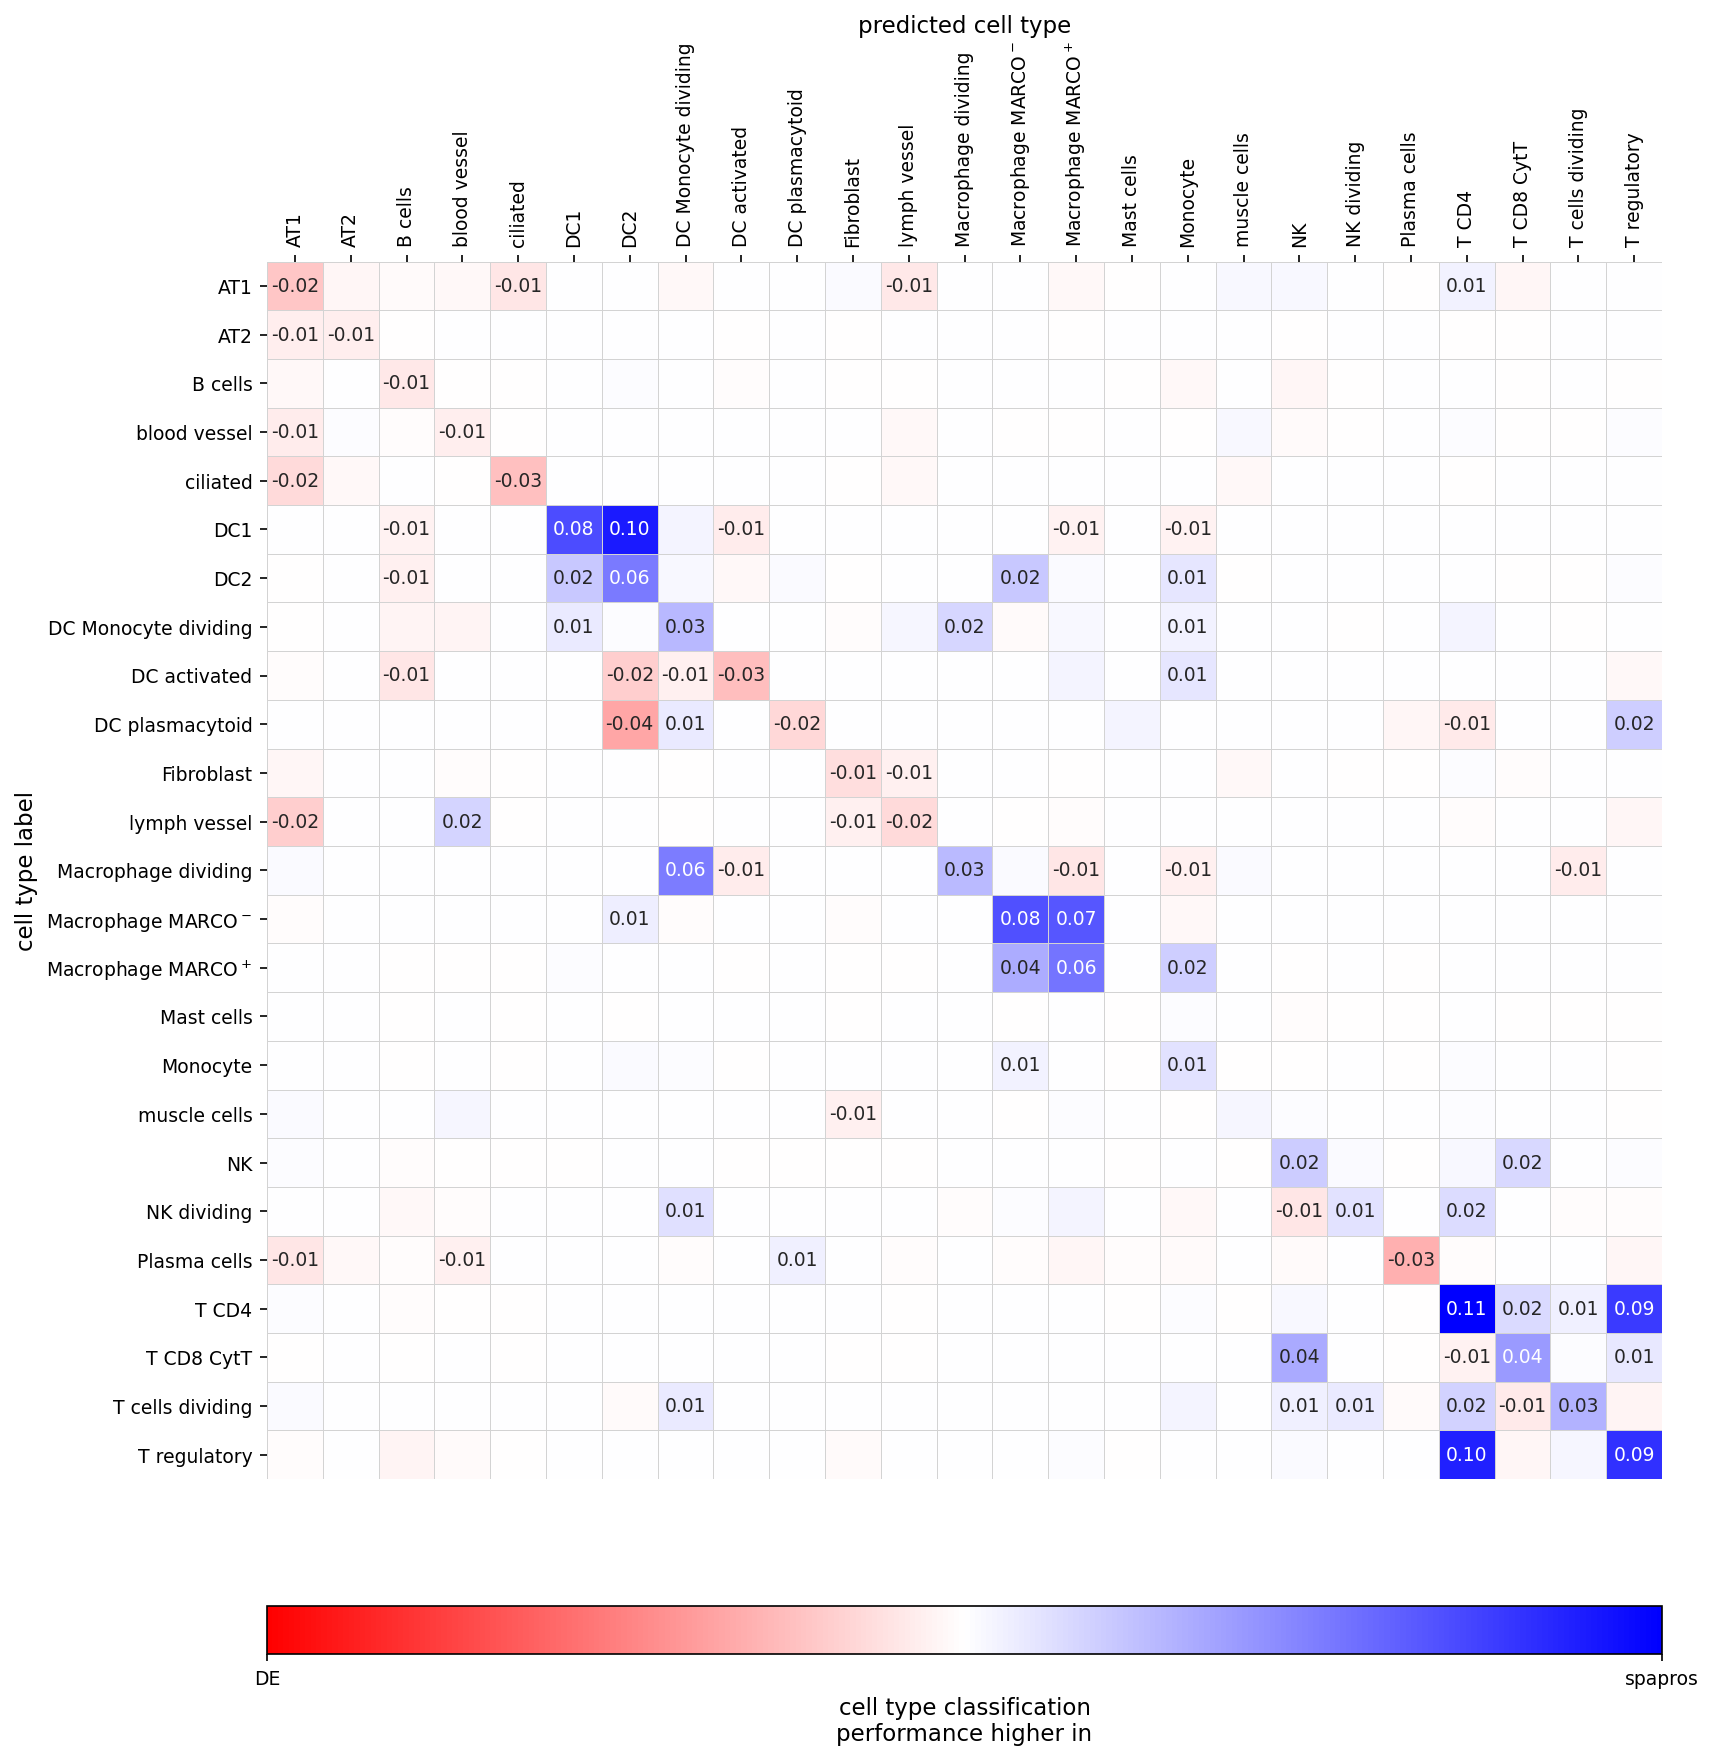

In [13]:
s_factor = 2

fig, (ax,cax) = plt.subplots(nrows=2, figsize=(6 * s_factor, s_factor * 6 * 1.025),  gridspec_kw={"height_ratios":[1,0.04]})

max_val = diff_mat.abs().max().max()

diff_mat_off_diag_inverted = diff_mat.copy()
off_diag_mask = ~np.eye(*diff_mat.shape, dtype=bool)
diff_mat_off_diag_inverted.values[off_diag_mask] = -diff_mat_off_diag_inverted.values[off_diag_mask]
formatter = lambda s: f"{s:.2f}" if (abs(s) > 0.005) else ""
annot = diff_mat_off_diag_inverted.applymap(formatter).values#[:, np.newaxis] if isinstance(annot,bool) else annot

# Invert colors of non diagonal values 
tmp = diff_mat.values.copy()
mask = np.ones(tmp.shape, dtype=bool)
np.fill_diagonal(mask, 0)
diff_mat_colors = diff_mat.copy()
diff_mat_colors.values[mask] = -diff_mat_colors.values[mask]

sns.heatmap(diff_mat_colors, cmap="bwr_r", cbar=False, ax=ax, vmin=-max_val, vmax=max_val, square=False, annot=annot, fmt="", 
            
            linewidths=0.45, linecolor="lightgrey",cbar_ax=None)#,
            #cbar_kws = dict(use_gridspec=False,location="bottom",orientation="horizontal"))#, annot=True, fmt=".2f")
    
cbar = fig.colorbar(ax.get_children()[0], cax=cax, orientation="horizontal")#,shrink=0.7, aspect=20*0.7,fraction=0.46, pad=0.4)
cbar.set_ticks([-max_val,max_val])
cbar.set_ticklabels(["DE","spapros"])
cbar.set_label('cell type classification\nperformance higher in')#('performance higher in')#, rotation=0)

plt.sca(ax)
plt.tick_params(axis="both", which="major", bottom=False, labelbottom=False, top=True, labeltop=True)
#ax.set_xticklabels(plt.gca().get_xticklabels(),ha="left")
plt.setp(plt.gca().get_xticklabels(), ha="center", ma="left", rotation=90)# ha="left", rotation=45)
#plt.title("cell type classif. spapros vs DE",fontsize=16)
plt.xlabel("predicted cell type")#("predicted")
ax.xaxis.set_label_position('top')
plt.ylabel("cell type label")#("label")
plt.show()
fig.savefig("./figures/Suppl_ct_clfs_diff.png", bbox_inches="tight")
#plt.close()